In [1]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from pylab import rcParams
import networkx as nx
from gensim.models import Word2Vec
import gensim
import numpy as np

In [2]:
df_sbert = pd.read_csv("sBERT_features.csv")

In [3]:
df_top_pos = df_sbert[df_sbert["label"] == 1]
df_top_neg = df_sbert[df_sbert["label"] == 0]

In [4]:
from sklearn.utils import resample
neg_upsample = resample(df_top_neg,
             replace=True,
             n_samples=len(df_top_pos),
             random_state=42)

print(neg_upsample.shape)

(519, 388)


In [5]:
data_upsampled = pd.concat([df_top_pos, neg_upsample])

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X_data = data_upsampled[df_sbert.columns[1:-3]]
y_data = data_upsampled['label']
X_train, X_test, y_train, y_test = train_test_split(X_data,
                            y_data, stratify=y_data, #keep the same ratio
                            test_size=0.1,
                            random_state=42)

In [7]:
## lasso - logistics - label - all features

In [8]:
lgclf = LogisticRegression(random_state=42, fit_intercept = True, solver = "liblinear", penalty ="l1").fit(X_train, y_train) 

In [9]:
print(cross_val_score(lgclf, X_train, y_train, cv=10))

[0.75531915 0.76595745 0.79787234 0.75531915 0.78494624 0.76344086
 0.74193548 0.75268817 0.75268817 0.80645161]


In [10]:
print("Accuracy Score:",lgclf.score(X_test, y_test))

Accuracy Score: 0.7980769230769231


In [11]:
lgclf.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lgclf.predict(X_test))

array([[41, 11],
       [10, 42]])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


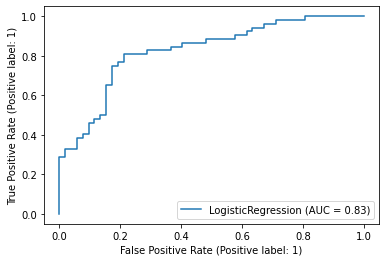

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rfc_disp = plot_roc_curve(lgclf, X_test, y_test)
plt.show()

In [14]:
## Ridge - logistics - label - all features

In [15]:
rgclf = LogisticRegression(random_state=42, fit_intercept = True, penalty ="l2").fit(X_train, y_train)

In [16]:
print(cross_val_score(rgclf, X_train, y_train, cv=10))

[0.79787234 0.81914894 0.84042553 0.75531915 0.82795699 0.79569892
 0.72043011 0.76344086 0.76344086 0.79569892]


In [17]:
print("Accuracy Score:",rgclf.score(X_test, y_test))

Accuracy Score: 0.7980769230769231


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rgclf.predict(X_test))

array([[41, 11],
       [10, 42]])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


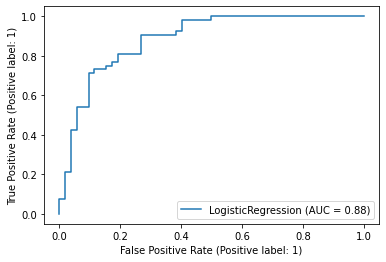

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rfc_disp = plot_roc_curve(rgclf, X_test, y_test)
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
X_data = data_upsampled[df_sbert.columns[1:-3]]
y_data = data_upsampled['rating']
X_train, X_test, y_train, y_test = train_test_split(X_data,
                            y_data,
                            test_size=0.1,
                            random_state=42)

In [22]:
olsclf = LinearRegression(fit_intercept = True).fit(X_train, y_train)

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, olsclf.predict(X_test))

293.85569564196516

In [24]:
olsclf.predict(X_test)

array([ -1.93480601,  -6.64600776, -26.62048404,  16.01085837,
        10.6034878 , -10.56471615, -18.05120705,  37.9691135 ,
       -28.72334193,   2.77885524,   9.69717526,  -4.47215168,
        57.64065048, -23.23588813,  -7.09034733, -10.64718949,
       -22.58874337, -20.144806  ,  -4.4797539 , -10.32457146,
        18.23949945,  10.21751131,   6.7304526 ,  -9.2118626 ,
        34.29144503,  35.42228152,  36.4350731 ,  -6.44170974,
        -5.56471593,   5.61291575,  38.10815138,  -4.74858399,
        -5.90888236,  -2.84119516,   0.8796413 ,   7.25782269,
       -31.51864161,   3.69267876,  15.08343566, -10.13017206,
       -12.28596971,  32.92177251, -28.20930493, -15.54250217,
        26.4821144 , -20.9257711 , -34.07140633,  -8.84821339,
       -23.94970734,   8.09294301, -14.09178476,  39.76773975,
        16.66966186, -16.19172633, -13.41844669,   7.09195747,
       -21.64847883, -20.31593625, -14.33358459,  -2.2614642 ,
       -12.97442943,  17.93375356,  40.11008934,  -7.89

In [25]:
import numpy as np
import scipy.stats
scipy.stats.pearsonr(olsclf.predict(X_test), y_test)

(0.6790530006873359, 2.32435769058969e-15)

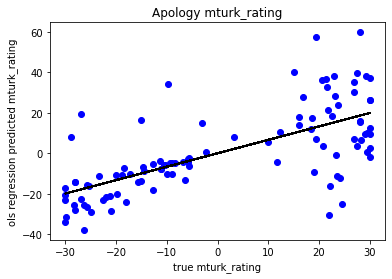

In [26]:
# Visualising the Test set results
theta = np.polyfit(y_test, olsclf.predict(X_test), 1)
y_line = theta[1] + theta[0] * y_test
plt.scatter(y_test, olsclf.predict(X_test), color = 'blue')
plt.plot(y_test, y_line, 'black')
plt.title('Apology mturk_rating')
plt.xlabel('true mturk_rating')
plt.ylabel('ols regression predicted mturk_rating')
plt.show()

In [27]:
def match():
    no_match = 0
    for i in range(len(y_test)):
        if y_test.to_list()[i] * olsclf.predict(X_test)[i] < 0:
            no_match = no_match + 1
    accuracy = 1- (no_match/len(y_test))
    print(accuracy)
            

In [28]:
match()

0.8557692307692308


In [29]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [30]:
rg1 = Ridge(alpha=0.001).fit(X_train, y_train)
rg1.predict(X_test)

array([  2.35736893,  -5.00302569, -26.24755924,  18.33989629,
        13.69253476,  -8.85086735, -11.9053653 ,  38.08034735,
       -25.74540158,   4.6182506 ,  14.97347247,  -4.68680979,
        54.71613257, -22.5958287 ,  -7.95426976, -10.62798419,
       -22.73349781, -19.21298054,  -4.55433313, -10.42635331,
        16.65585852,   9.40845167,   9.595016  ,  -6.99217823,
        30.77228219,  35.33278431,  35.52836598,  -5.40296867,
        -4.86861364,   4.61671774,  36.84057023,  -4.70901024,
        -5.95809452,  -2.07167422,   2.17590876,   8.22120597,
       -29.97831879,   4.40566611,  14.93251217,  -9.63927092,
        -9.54026109,  31.35029444, -27.72545336, -15.02331899,
        27.60555234, -20.98812062, -34.88613889,  -9.12430034,
       -25.30685963,   2.91075758, -13.86913364,  37.39943233,
        13.28512207,  -9.21741896, -13.42012757,   7.71071262,
       -21.52922508, -20.47340449, -13.84688985,  -2.63725316,
       -14.29497216,  15.8176292 ,  40.94848419,  -8.05

In [31]:
mean_squared_error(y_test, rg1.predict(X_test))

266.6840799023011

In [32]:
import numpy as np
import scipy.stats
scipy.stats.pearsonr( rg1.predict(X_test), y_test)

(0.703767557024503, 7.946567465086885e-17)

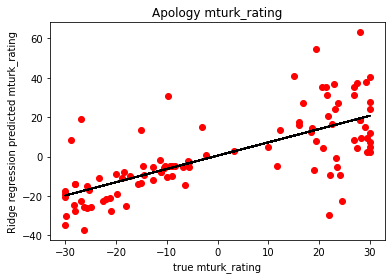

In [33]:
# Visualising the Test set results
theta = np.polyfit(y_test, rg1.predict(X_test), 1)
y_line = theta[1] + theta[0] * y_test
plt.scatter(y_test, rg1.predict(X_test), color = 'red')
plt.plot(y_test, y_line, 'black')
plt.title('Apology mturk_rating')
plt.xlabel('true mturk_rating')
plt.ylabel('Ridge regression predicted mturk_rating')
plt.show()

In [34]:
def match():
    no_match = 0
    for i in range(len(y_test)):
        if y_test.to_list()[i] * rg1.predict(X_test)[i] < 0:
            no_match = no_match + 1
    accuracy = 1- (no_match/len(y_test))
    print(accuracy)

In [35]:
match()

0.8653846153846154


In [36]:
lo1 = Lasso(alpha=0.001).fit(X_train, y_train)
lo1.predict(X_test)

array([ 11.92537901,   0.68844011, -22.15449044,  23.82649785,
        16.37611904,  -7.81008169,  -0.50091556,  37.01073501,
       -20.86558555,   6.65165667,  21.15300333,  -4.96148448,
        40.64197293, -21.61331061, -18.02048143, -13.85536952,
       -20.37764539, -16.7486058 ,   0.28525069,  -9.85790754,
        12.51979066,   9.99910424,  18.33121651,  -1.12477051,
        16.17533994,  35.69107092,  24.82429092,  -3.44159844,
        -1.83461571,   0.19400574,  28.85966222,  -4.16207946,
        -7.33109517,  -1.89551162,   4.55713162,  15.82825646,
       -24.1891657 ,   3.85864146,  16.82772982, -10.3990305 ,
        -1.21154779,  25.37468872, -26.94964349, -10.93594863,
        24.55817942, -17.55596824, -30.75939551,  -9.34339156,
       -24.46370743, -10.66589439, -14.45736673,  30.72187262,
         1.93589501,   9.02419329, -13.22568345,  13.93381613,
       -22.30144275, -19.0092118 , -11.39634148,  -2.17647129,
       -12.75715603,  10.0973118 ,  40.02885717,  -6.32

In [37]:
mean_squared_error(y_test, lo1.predict(X_test))

209.40472792431981

In [38]:
#correlation and pvalue
import numpy as np
import scipy.stats
scipy.stats.pearsonr(lo1.predict(X_test), y_test)

(0.7588341935812265, 1.0422606075083437e-20)

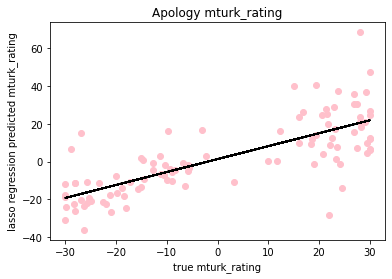

In [39]:
# Visualising the Test set results
theta = np.polyfit(y_test, lo1.predict(X_test), 1)
y_line = theta[1] + theta[0] * y_test
plt.scatter(y_test, lo1.predict(X_test), color = 'pink')
plt.plot(y_test, y_line, 'black')
plt.title('Apology mturk_rating')
plt.xlabel('true mturk_rating')
plt.ylabel('lasso regression predicted mturk_rating')
plt.show()

In [40]:
def match():
    no_match = 0
    for i in range(len(y_test)):
        if y_test.to_list()[i] * lo1.predict(X_test)[i] < 0:
            no_match = no_match + 1
    accuracy = 1- (no_match/len(y_test))
    print(accuracy)

In [41]:
match()

0.875


### Try dimension reduction and use the first and second feature that explain the most variance

In [ ]:
# dimension reduction

In [46]:
import sklearn.decomposition
import sklearn.manifold

In [47]:
X_data = df_sbert[df_sbert.columns[1:-3]]

In [48]:
pcaWords_hero = sklearn.decomposition.PCA(n_components = 50).fit(X_data)
reducedPCA_data = pcaWords_hero.transform(X_data)
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [49]:
df_component = pd.DataFrame(tsneWords, columns = ["c1", "c2"])
df_component["label"]  = df_sbert.label.to_list()

In [50]:
df_component["rating"]  = df_sbert.rating.to_list()

In [51]:
df_component

,c1,c2,label,rating
0,10.179790,-6.486329,1,20.333333
1,-6.272509,21.583088,0,-14.000000
2,2.072599,-6.621886,1,27.500000
3,4.251818,-3.971762,1,30.000000
4,-0.158930,8.648897,1,23.750000
...,...,...,...,...
775,-4.519654,13.719292,1,28.333333
776,22.926817,4.966261,1,10.857143
777,8.404155,14.338411,1,26.272727
778,25.902931,8.999016,1,19.500000


In [52]:
df_top_pos = df_component[df_component["label"] == 1]
df_top_neg = df_component[df_component["label"] == 0]

In [53]:
from sklearn.utils import resample
neg_upsample = resample(df_top_neg,
             replace=True,
             n_samples=len(df_top_pos),
             random_state=42)

print(neg_upsample.shape)

(519, 4)


In [54]:
data_upsampled = pd.concat([df_top_pos, neg_upsample])

In [55]:
X_data = data_upsampled[["c1","c2"]]
y_data = data_upsampled['label']
X_train, X_test, y_train, y_test = train_test_split(X_data,
                            y_data, stratify=y_data, #keep the same ratio
                            test_size=0.1,
                            random_state=42)

In [56]:
lgclf = LogisticRegression(random_state=42, fit_intercept = True, solver = "liblinear").fit(X_train, y_train) 

In [ ]:
#cross validation score (10-fold)

In [57]:
print(cross_val_score(lgclf, X_train, y_train, cv=10))

[0.56382979 0.53191489 0.56382979 0.58510638 0.46236559 0.60215054
 0.49462366 0.53763441 0.59139785 0.49462366]


In [ ]:
#model peformance on testing samples

In [58]:
print("Accuracy Score:",lgclf.score(X_test, y_test)) # compress information - information loss

Accuracy Score: 0.5576923076923077


In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lgclf.predict(X_test))

array([[31, 21],
       [25, 27]])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


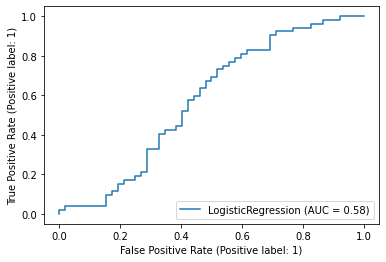

In [60]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rfc_disp = plot_roc_curve(lgclf, X_test, y_test)
plt.show()

In [61]:
X_data = data_upsampled[["c1","c2"]]
y_data = data_upsampled['rating']
X_train, X_test, y_train, y_test = train_test_split(X_data,
                            y_data,
                            test_size=0.1,
                            random_state=42)

In [62]:
lrclf = LinearRegression(fit_intercept = True).fit(X_train, y_train)

In [63]:
mean_squared_error(y_test, lrclf.predict(X_test))

458.505531862629

In [64]:
import numpy as np
import scipy.stats
scipy.stats.pearsonr(lrclf.predict(X_test), y_test)

(0.15948631316675468, 0.10584393306079717)

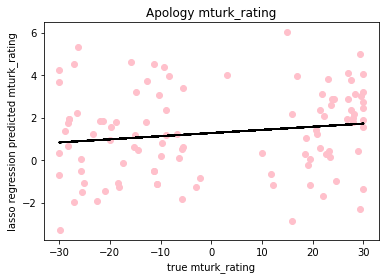

In [65]:
# Visualising the Test set results
theta = np.polyfit(y_test, lrclf.predict(X_test), 1)
y_line = theta[1] + theta[0] * y_test
plt.scatter(y_test, lrclf.predict(X_test), color = 'pink')
plt.plot(y_test, y_line, 'black')
plt.title('Apology mturk_rating')
plt.xlabel('true mturk_rating')
plt.ylabel('lasso regression predicted mturk_rating')
plt.show()

In [66]:
def match():
    no_match = 0
    for i in range(len(y_test)):
        if y_test.to_list()[i] * lrclf.predict(X_test)[i] < 0:
            no_match = no_match + 1
    accuracy = 1- (no_match/len(y_test))
    print(accuracy)

In [67]:
match()

0.5480769230769231
